In [1]:
library(rstan)
library(brms)

rstan_options(auto_write = TRUE)
options(mc.cores = parallel::detectCores())

file_beer_sales_2 <- read.csv("https://raw.githubusercontent.com/logics-of-blue/book-r-stan-bayesian-model-intro/master/book-data/3-2-1-beer-sales-2.csv")

Loading required package: StanHeaders
Loading required package: ggplot2
rstan (Version 2.19.2, GitRev: 2e1f913d3ca3)
For execution on a local, multicore CPU with excess RAM we recommend calling
options(mc.cores = parallel::detectCores()).
To avoid recompilation of unchanged Stan programs, we recommend calling
rstan_options(auto_write = TRUE)
Loading required package: Rcpp
Loading 'brms' package (version 2.9.0). Useful instructions
can be found by typing help('brms'). A more detailed introduction
to the package is available through vignette('brms_overview').

Attaching package: ‘brms’

The following object is masked from ‘package:rstan’:

    loo



In [3]:
simple_lm_brms <- brm(
    formula = sales ~ temperature,
    family = gaussian(link = "identity"),
    data = file_beer_sales_2,
    seed = 1
)
simple_lm_brms

Compiling the C++ model
Start sampling


 Family: gaussian 
  Links: mu = identity; sigma = identity 
Formula: sales ~ temperature 
   Data: file_beer_sales_2 (Number of observations: 100) 
Samples: 4 chains, each with iter = 2000; warmup = 1000; thin = 1;
         total post-warmup samples = 4000

Population-Level Effects: 
            Estimate Est.Error l-95% CI u-95% CI Eff.Sample Rhat
Intercept      21.21      5.93     9.44    32.81       3387 1.00
temperature     2.46      0.29     1.90     3.03       3392 1.00

Family Specific Parameters: 
      Estimate Est.Error l-95% CI u-95% CI Eff.Sample Rhat
sigma    16.98      1.23    14.75    19.65       3720 1.00

Samples were drawn using sampling(NUTS). For each parameter, Eff.Sample 
is a crude measure of effective sample size, and Rhat is the potential 
scale reduction factor on split chains (at convergence, Rhat = 1).

Markov Chain Monte Carlo (MCMC) output:
Start = 4001 
End = 8000 
Thinning interval = 1 
          parameters
iterations b_Intercept b_temperature    sigma      lp__
      [1,]  37.9010247      1.595612 16.88009 -432.9044
      [2,]  11.3019167      2.963069 18.12456 -430.2459
      [3,]  24.8817214      2.249865 17.30417 -428.6601
      [4,]  17.3820339      2.671692 16.47529 -428.5918
      [5,]  12.9284538      2.887286 18.34632 -430.0455
      [6,]  15.7612937      2.704757 18.13742 -429.2604
      [7,]   9.5732590      3.123414 18.61913 -431.9507
      [8,]  21.3859479      2.523215 18.05355 -429.1807
      [9,]  24.2753510      2.291426 15.69918 -428.8617
     [10,]  11.7346761      3.082694 17.56117 -432.1098
     [11,]  29.7638377      2.221368 17.24970 -431.2207
     [12,]  12.3952664      2.873539 17.61764 -429.5498
     [13,]  13.5287378      2.856665 17.71453 -429.4763
     [14,]  11.5120478      3.023568 18.07967 -430.9214
     [15,]  13.3331095      2.920095 17.76266 -430

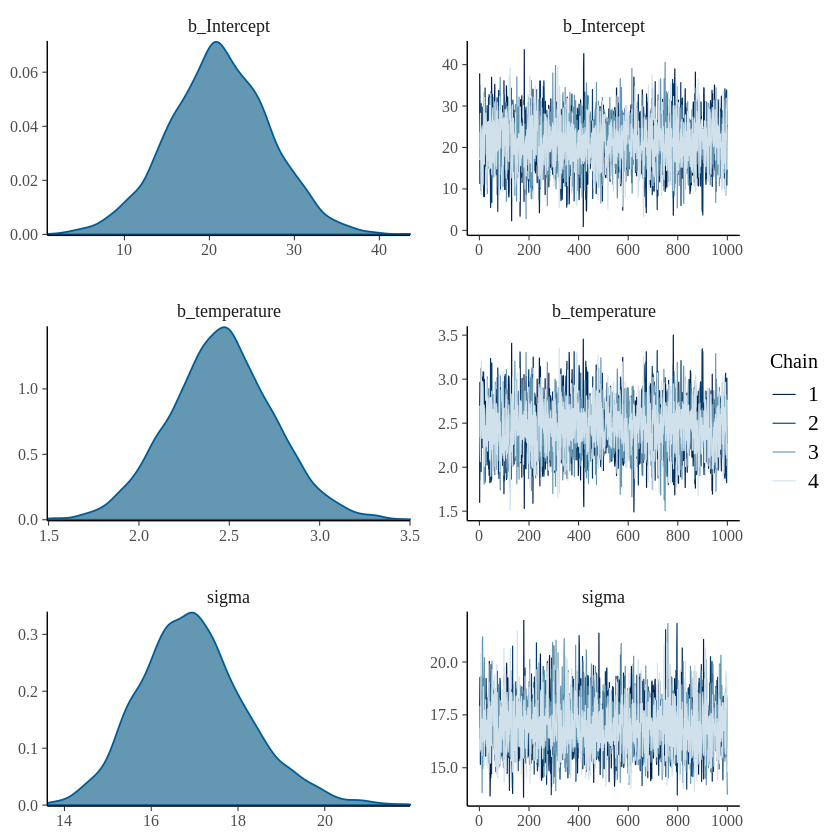

In [4]:
as.mcmc(simple_lm_brms, combine_chains = TRUE)
plot(simple_lm_brms)

In [5]:
simple_lm_formula <- bf(sales ~ temperature)

In [6]:
gaussian()


Family: gaussian 
Link function: identity 


In [7]:
binomial()


Family: binomial 
Link function: logit 


In [8]:
poisson()


Family: poisson 
Link function: log 


In [9]:
simple_lm_brms2 <- brm(
    formula = simple_lm_formula,
    family = gaussian(), # default identity
    data = file_beer_sales_2,
    seed = 1,
    chains = 4,
    iter = 2000,
    warmup = 2000,
    thin = 1
)

Compiling the C++ model
recompiling to avoid crashing R session
Start sampling


ERROR: Error in FUN(newX[, i], ...): is.atomic(x) is not TRUE


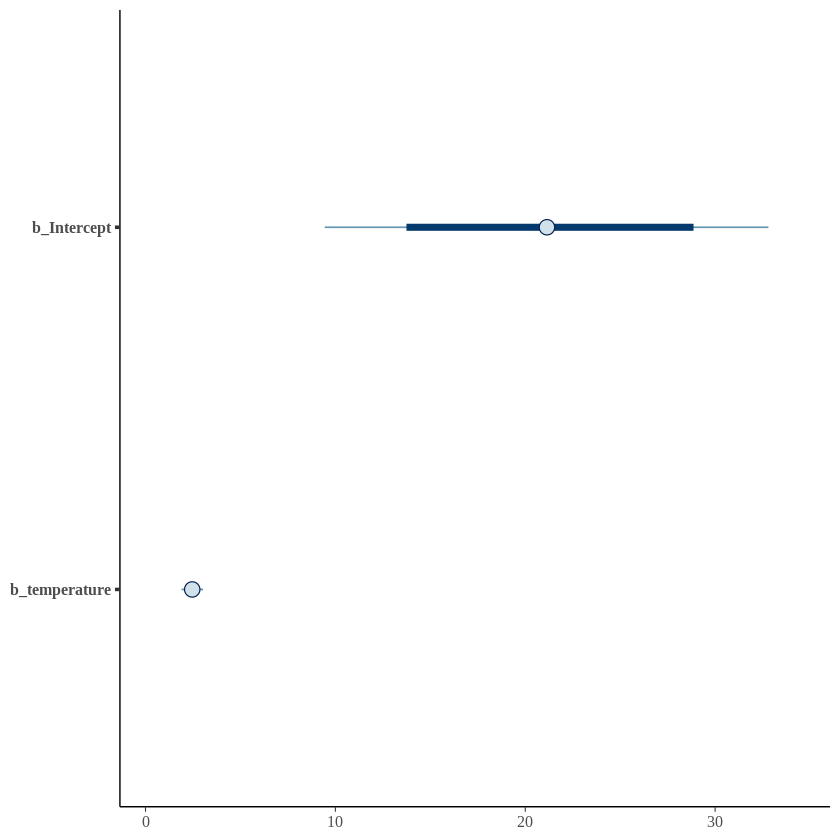

In [11]:
stanplot(simple_lm_brms,
         type = "intervals",
         pars = "^b_",
         prob = 0.8,
         prob_outer = 0.95
)

In [12]:
new_data <- data.frame(temperature = 20)
fitted(simple_lm_brms, new_data)

Estimate,Est.Error,Q2.5,Q97.5
70.37724,1.689054,67.17641,73.71709


In [13]:
set.seed(1)
predict(simple_lm_brms, new_data)

Estimate,Est.Error,Q2.5,Q97.5
70.37222,17.74418,34.4835,104.9936


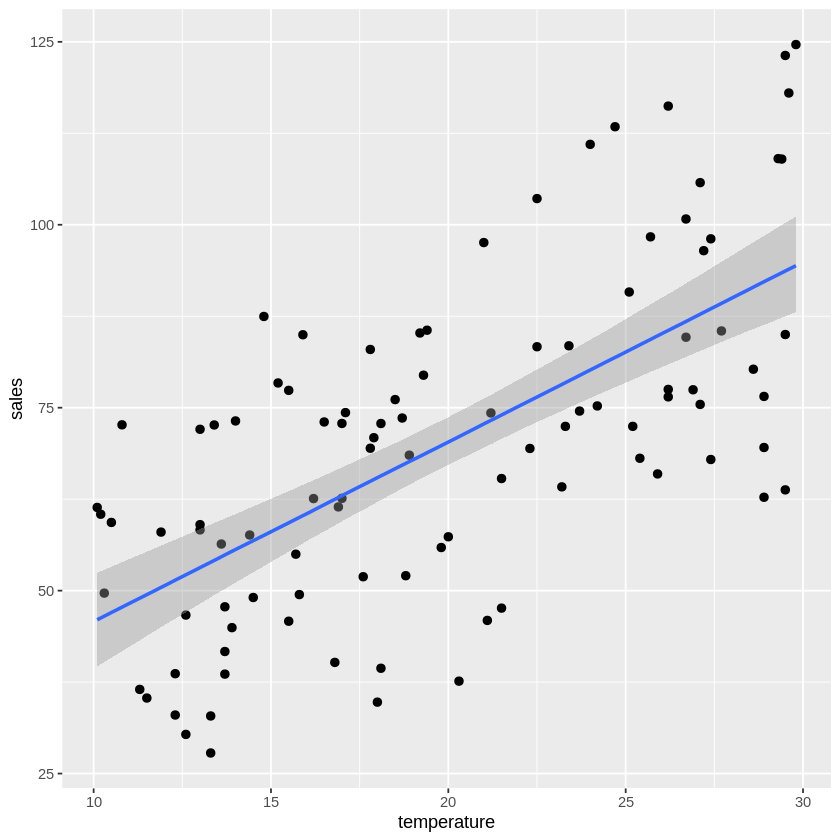

In [14]:
eff <- marginal_effects(simple_lm_brms)
plot(eff, points = TRUE)

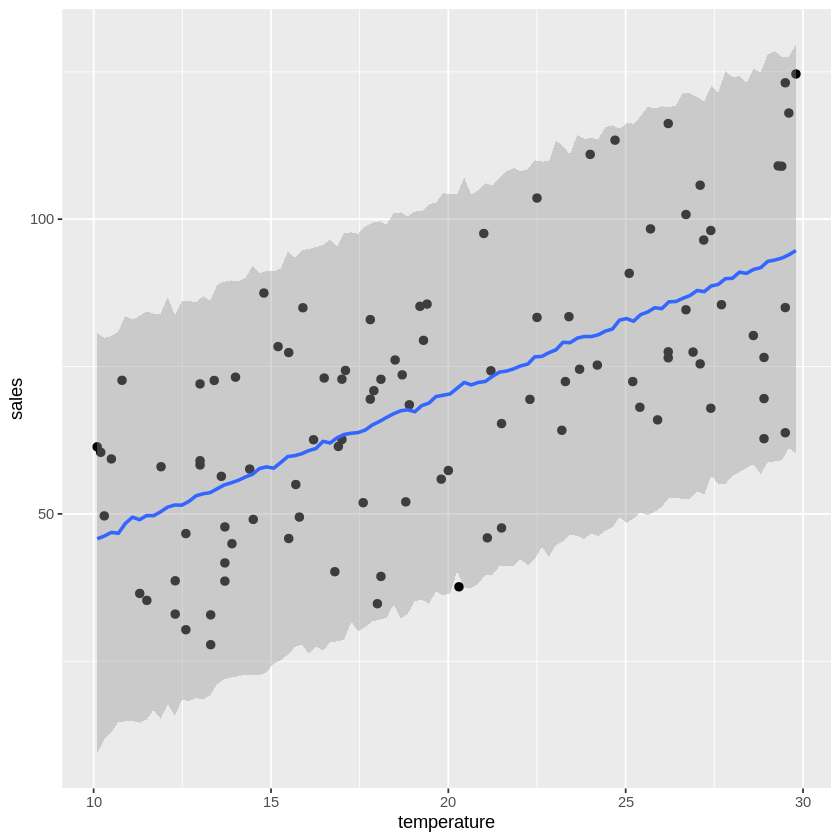

In [15]:
set.seed(1)
eff_pre <- marginal_effects(simple_lm_brms, method = "predict")
plot(eff_pre, points = TRUE)